# **1. Prerequisite** 

In [1]:
!pip install PyQt5
!pip install pyqtgraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.4 MB 27.4 MB/s 
     |████████████████████████████████| 344 kB 75.7 MB/s 
     |████████████████████████████████| 59.9 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 995 kB 26.3 MB/s 


#  **2. Installing iris_lmsalpy Package**

In [2]:
!git clone https://gitlab.com/LMSAL_HUB/iris_hub/iris_lmsalpy.git
%cd /content/iris_lmsalpy/
#%cd /content/drive/MyDrive/ALSSC_spectroscopy_project/LMSAL_HUB/iris_hub/iris_lmsalpy
!python setup.py install

Cloning into 'iris_lmsalpy'...
remote: Enumerating objects: 851, done.
remote: Counting objects: 100% (601/601), done.
remote: Compressing objects: 100% (294/294), done.
remote: Total 851 (delta 384), reused 480 (delta 300), pack-reused 250
Receiving objects: 100% (851/851), 377.35 MiB | 32.57 MiB/s, done.
Resolving deltas: 100% (536/536), done.
/content/iris_lmsalpy
running install
running bdist_egg
running egg_info
running build_src
build_src
creating iris_lmsalpy.egg-info
writing iris_lmsalpy.egg-info/PKG-INFO
writing dependency_links to iris_lmsalpy.egg-info/dependency_links.txt
writing top-level names to iris_lmsalpy.egg-info/top_level.txt
writing manifest file 'iris_lmsalpy.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'iris_lmsalpy.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/iris_lmsalpy
copying iris_lmsalpy/im_view.py -> build/l

#**3. Mount The drive:**  
*Click on the Files option in the left pannel, select the Mount drive option to access the contents of your drive.* 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **4. Plotting slit on SJI Images**

In [4]:
!pip install irisreader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.4 MB 1.4 MB/s 
  Created wheel for irisreader: filename=irisreader-0.3.2-py3-none-any.whl size=25582706 sha256=91e47ea3d6545c403802301d15596b079232e2b14f9b4ff49b53174277f31e1f
  Stored in directory: /root/.cache/pip/wheels/d6/b0/12/e8eeebac27eb86462fb2327125e0daea00be66f8230db50559
Successfully built irisreader


In [5]:
import irisreader
sji_1330 = '/content/drive/MyDrive/ALSSC_spectroscopy_project/sji/iris_l2_20140203_130621_3860259281_SJI_1330_t000.fits'
data_1330 = irisreader.sji_cube(sji_1330)
data_1330.time_specific_headers[0]['DATE_OBS']

'2014-02-03T13:06:21.620'

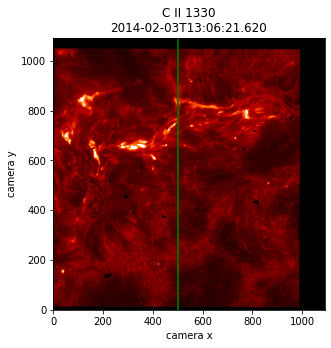

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#png_path = '/content/drive/MyDrive/ALSSC_spectroscopy_project/sji_png/'
for i in range(1):
    fig, ax = plt.subplots(figsize=(10,5))
    x = data_1330.get_slit_pos(i)
    ax.vlines(x,ymin=0, ymax =1093,colors = 'green')  #vertical lines plot
    data_1330.plot(i,units='pixels')
    #print(x)
    #plt.savefig('sji1330_'+str(i)+'.jpg',dpi=600)
    plt.show()

# **5. Inspection of a raster IRIS Level 2 data file**

**Importing Required Packages**

In [8]:
import iris_lmsalpy
from iris_lmsalpy import extract_irisL2data
import irisreader
import glob
from astropy.wcs import WCS     #to plot coordinate and wavelength
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.optimize import curve_fit

In [9]:
!pip install iris_lmsalpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Getting the path of every raster file**

In [10]:
raster_files = sorted(glob.glob('/content/drive/MyDrive/ALSSC_spectroscopy_project/raster/*.fits'))

**Getting Info of lines in the raster file**


In [11]:
lines = extract_irisL2data.show_lines(raster_files[0])  # Only first file is choosen for example


Extracting information from file /content/drive/MyDrive/ALSSC_spectroscopy_project/raster/iris_l2_20140203_130621_3860259281_raster_t000_r00000.fits... 

Available data with size Y x X x Wavelength are stored in windows labeled as:

--------------------------------------------------------------------
Index --- Window label --- Y x X x WL --- Spectral range [AA] (band)
--------------------------------------------------------------------
  0 	 C II 1336    	   1093x8x175 	   1332.70 - 1337.22  (FUV)
  1 	 1343         	   1093x8x78 	   1342.28 - 1344.28  (FUV)
  2 	 Fe XII 1349  	   1093x8x126 	   1347.68 - 1350.93  (FUV)
  3 	 O I 1356     	   1093x8x141 	   1352.25 - 1355.88  (FUV)
  4 	 Si IV 1403   	   1093x8x289 	   1398.63 - 1405.96  (FUV)
  5 	 2832         	   1093x8x120 	   2831.20 - 2834.23  (NUV)
  6 	 2826         	   1093x8x152 	   2824.71 - 2828.55  (NUV)
  7 	 2814         	   1093x8x153 	   2812.51 - 2816.38  (NUV)
  8 	 Mg II k 2796 	   1093x8x634 	   2790.49 - 2806.61 

# **6. Visualizing and selecting raster IRIS Level 2 data**

**Reading Raster file in a data cube for O I 1356 Window**

In [12]:
raster_cube = irisreader.raster_cube(raster_files,line='O') # O is for O I 1356 window

**Getting Wavelenth range for O I 1356 Window**

In [16]:
hdr = extract_irisL2data.only_header(raster_files[13],extension=4) # 4 is extension for O I 1356 Window, 13 is particular raster file
hdr1 = extract_irisL2data.only_header(raster_files[13]) 
m_to_nm = 1e9  # convert wavelength to nm
cube_shape = raster_cube.shape
nwave = cube_shape[2]
wcs = WCS(hdr)
wavelength = wcs.all_pix2world(np.arange(nwave), [0.], [0.], 0)[0] * m_to_nm 
print,(hdr)

(<function print>,
 XTENSION= 'IMAGE   '           / IMAGE extension                                
 BITPIX  =                   16 / Number of bits per data pixel                  
 NAXIS   =                    3 / Number of data axes                            
 NAXIS1  =                  141 /                                                
 NAXIS2  =                 1093 /                                                
 NAXIS3  =                    8 /                                                
 PCOUNT  =                    0 / No Group Parameters                            
 GCOUNT  =                    1 / One Data Group                                 
 BSCALE  =                 0.25 /                                                
 BZERO   =                 7992 /                                                
 CDELT1  =      0.0259600002319 /                                                
 CDELT2  =             0.166350 /                                              

**Plotting the 2D Spectral Image for O I 1356 Window, Only a particular raster 13 and scan number or exposure number 5**

In [1]:
data_5 = raster_cube.get_raster_pos_data(5)
extent = [wavelength[0],wavelength[-1],0,cube_shape[1]]
fig, ax = plt.subplots(1)
rect = patches.Rectangle((135.26,700),0.315,140, edgecolor='g',linewidth=2, facecolor="none")
ax.imshow(data_5[15,:,:],origin='lower', extent = extent,aspect='auto',vmin=-20,vmax=80)
ax.add_patch(rect)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Slit (Pixels)')
plt.title('Raster 13 Exposure number 5')


NameError: name 'raster_cube' is not defined

Wavelength[14] = 134.80168
Wavelength[129] =135.10040

**Plotting the Spectrum for the pixel 805 in the Y-axis**

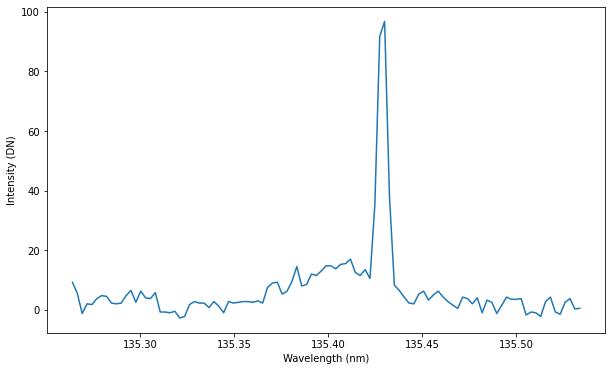

In [22]:

plt.plot(wavelength[15:120],data_5[27,805,15:120])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
plt.show()

**Plotting Average Spectrum of the green box**

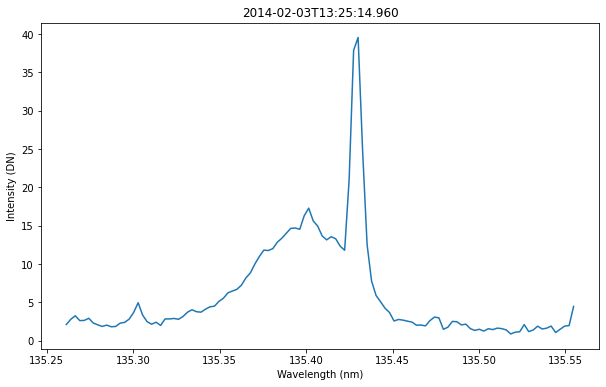

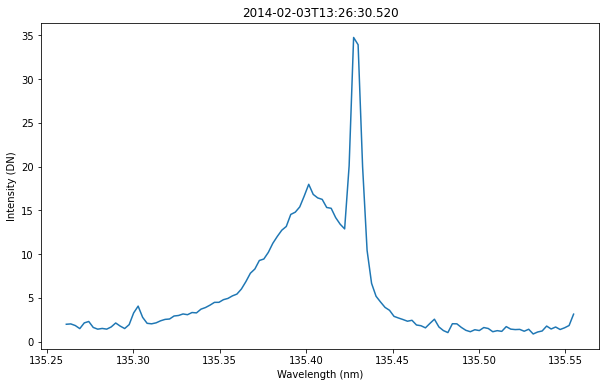

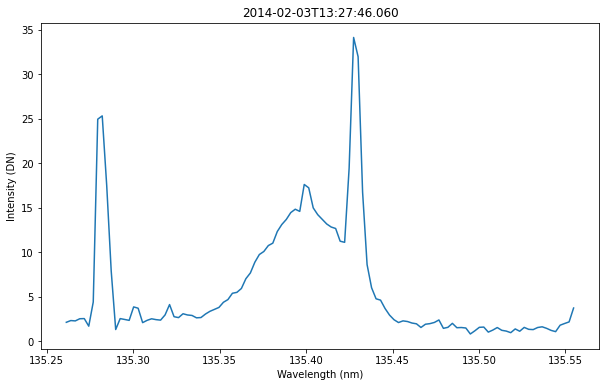

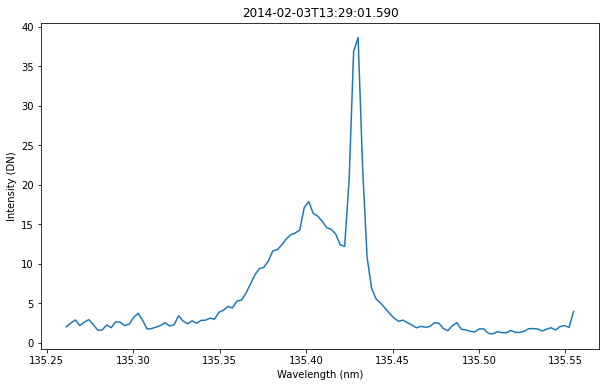

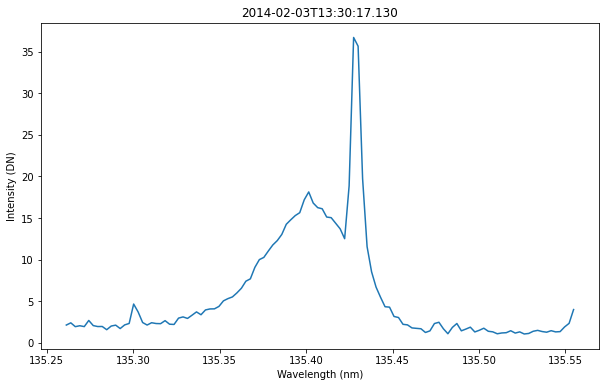

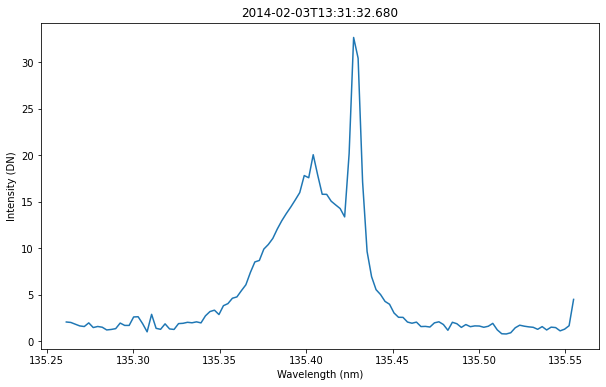

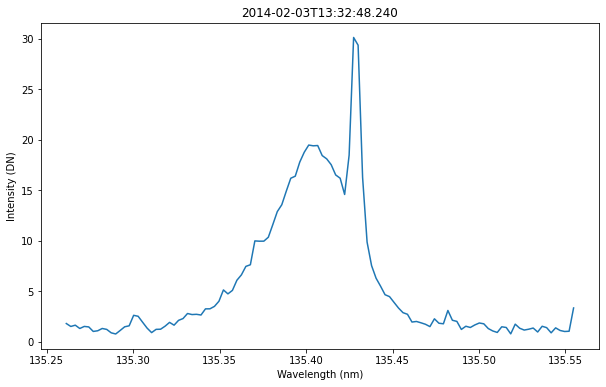

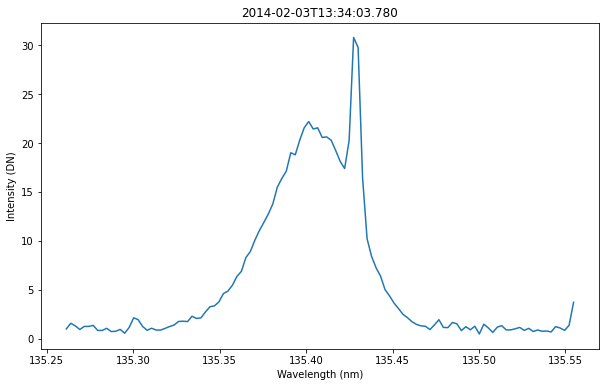

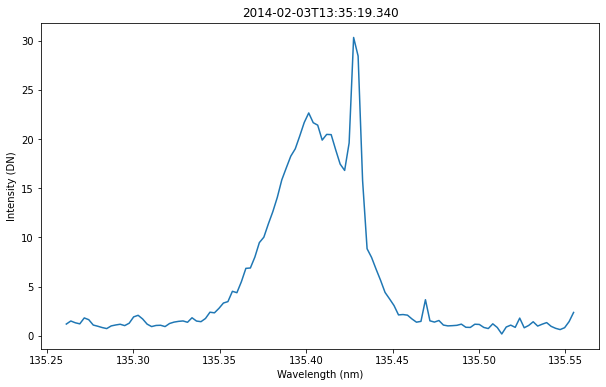

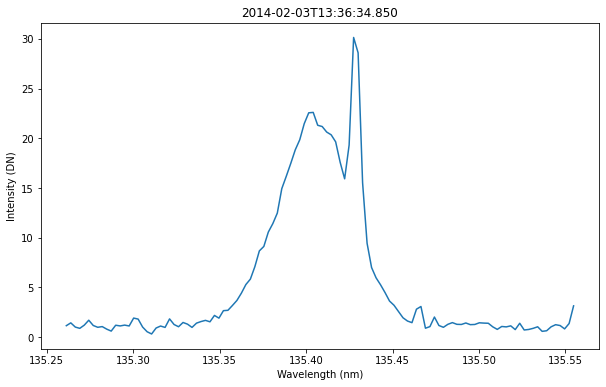

(10, 114)


In [23]:
shape = (10,114)
box_data_avg = np.zeros(shape)
for j in range(10):
  hdr1 = extract_irisL2data.only_header(raster_files[j+15]) 
  box_data = data_5[15+j,700:840,14:128]
  box_data_avg[j,:] = np.average(box_data,axis=0)
  plt.plot(wavelength[14:128],box_data_avg[j,:])
  plt.xlabel("Wavelength (nm)")
  plt.ylabel("Intensity (DN)")
  plt.title(hdr1['DATE_OBS'])
  plt.show()

print(np.shape(box_data_avg))



# **7. FeXXI Line analysis**

# **7.1 Fitting the Spectrum**

In [24]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

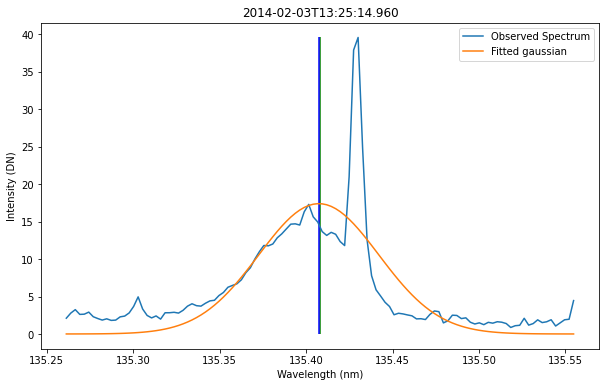

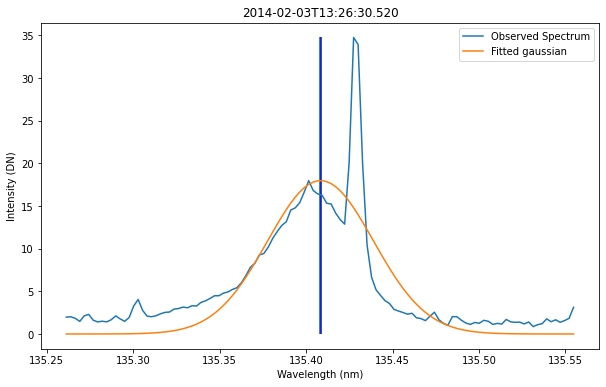

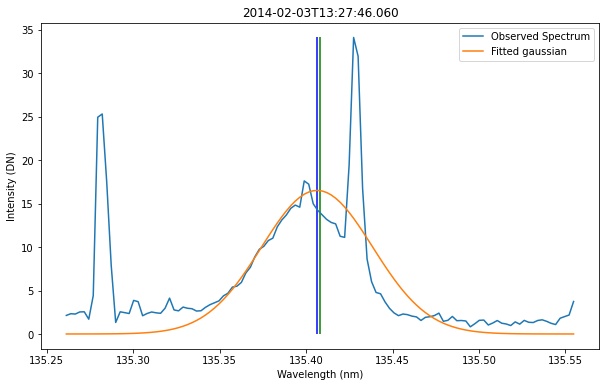

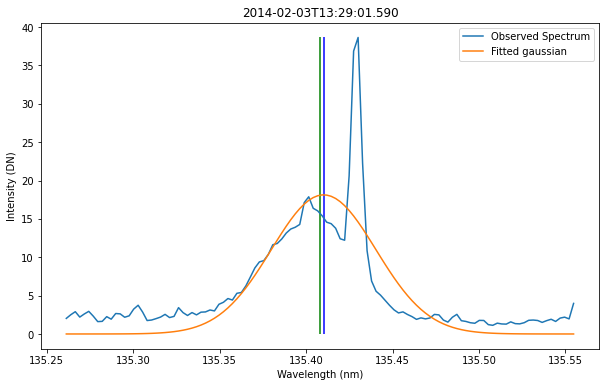

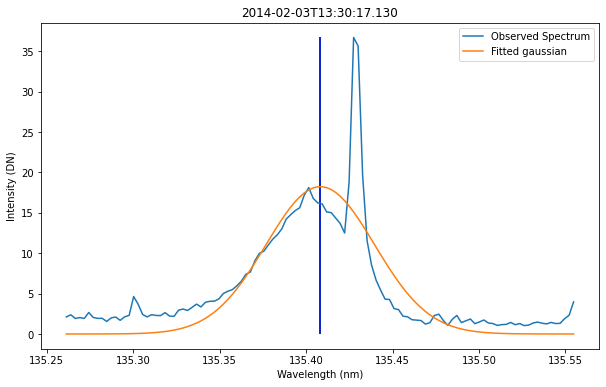

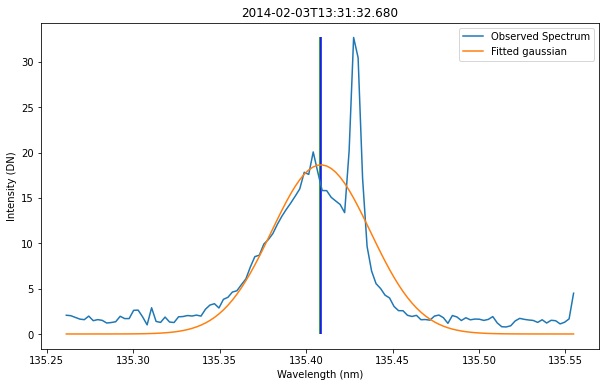

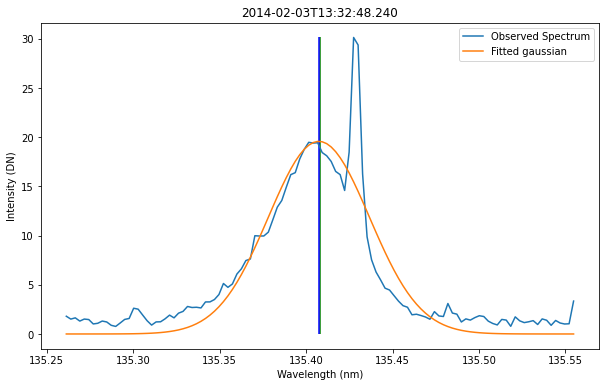

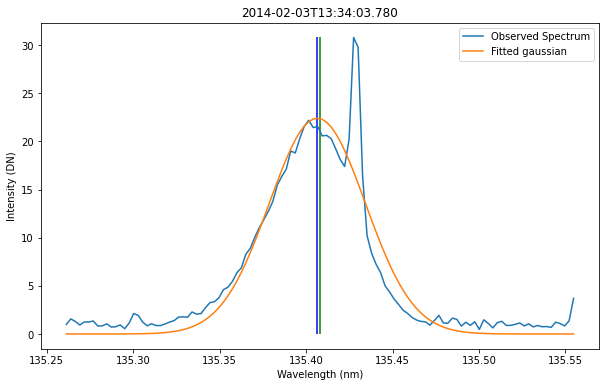

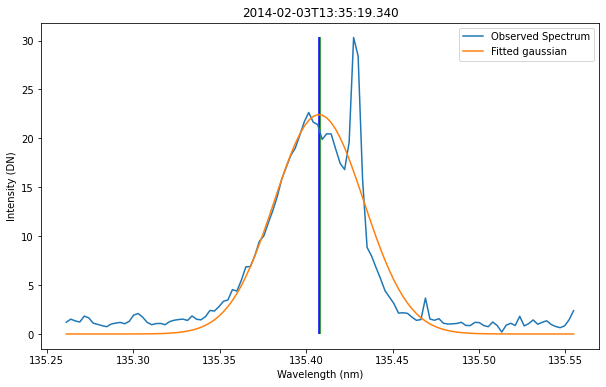

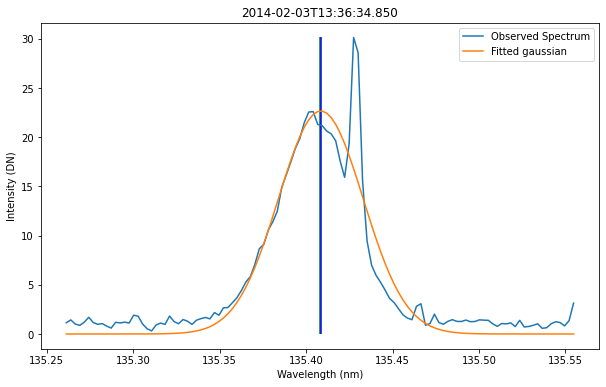

In [25]:

wvl = wavelength[14:128]
s = (10,3)
c1 = np.zeros(s)
wvl_rest = 135.408
for j in range(10):
  sp = box_data_avg[j,:]
  # p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
  p = [15., 135.4, 0.05]
  coeff, var_matrix = curve_fit(gauss, wvl, sp, p0=p)
  c1[j,:] = coeff
  # Get the fitted curve
  sp_fit = gauss(wvl, *coeff)
  hdr1 = extract_irisL2data.only_header(raster_files[j+15]) 
  plt.plot(wvl, sp, label='Observed Spectrum')
  plt.plot(wvl, sp_fit, label='Fitted gaussian')
  plt.vlines(wvl_rest,ymin=0, ymax =np.amax(sp),colors = 'green')  #vertical lines plot
  plt.vlines(coeff[1],ymin=0, ymax =np.amax(sp),colors = 'blue')
  plt.legend()
  plt.title(hdr1['DATE_OBS'])
  plt.xlabel("Wavelength (nm)")
  plt.ylabel("Intensity (DN)")
  # Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
  #print('Fitted mean = ', coeff[1])
  #print('Fitted standard deviation = ', coeff[2])

  plt.show()


**Highlighting the blending**

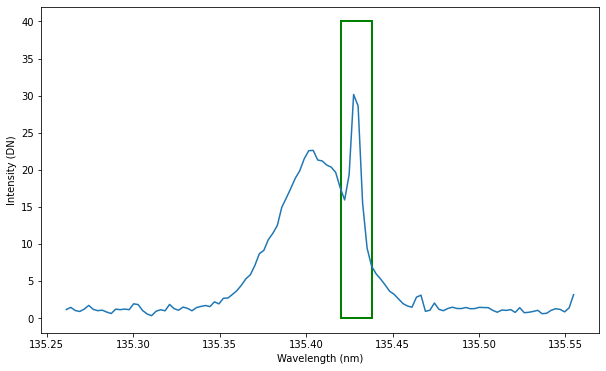

In [26]:
box_data1 = data_5[15,700:840,14:125]
box_data_avg1 = np.average(box_data,axis=0)
fig, ax = plt.subplots(1)
ax.plot(wavelength[14:128],box_data_avg1)
rect = patches.Rectangle((135.42,0),0.018,40, edgecolor='g',linewidth=2, facecolor="none")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
ax.add_patch(rect)
plt.show()

**Removing The Blending**

In [27]:
wavelength[75:83]

array([135.41970903, 135.42230503, 135.42490103, 135.42749703,
       135.43009303, 135.43268903, 135.43528503, 135.43788103])

In [28]:
wave = np.concatenate((wavelength[14:75],wavelength[84:128]), axis = None)
#print(np.shape(wave))
data = []
for j in range(10):
  e,f = box_data_avg[j,0:61],box_data_avg[j,70:114]
  d = np.concatenate((e,f),axis=None)
  data.append(d)
  #print(np.shape(d))
print(np.shape(data))

(10, 105)


Fitted mean =  135.39807642765183
Fitted standard deviation =  0.03598992195196829


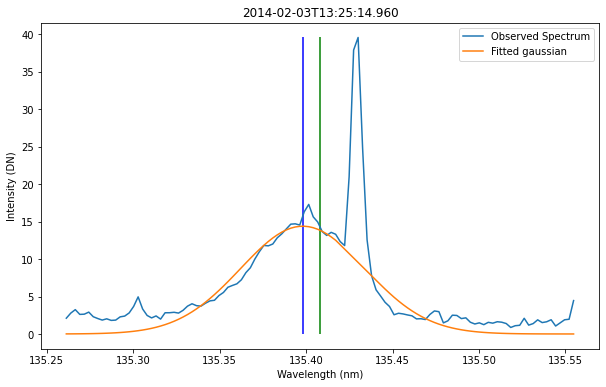

Fitted mean =  135.40166561019913
Fitted standard deviation =  0.03156061204932514


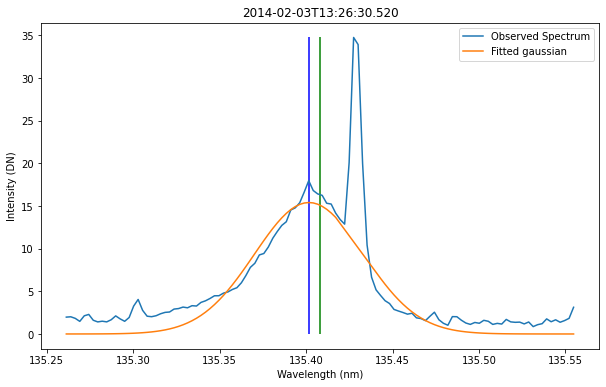

Fitted mean =  135.39964511474662
Fitted standard deviation =  0.03212445689655075


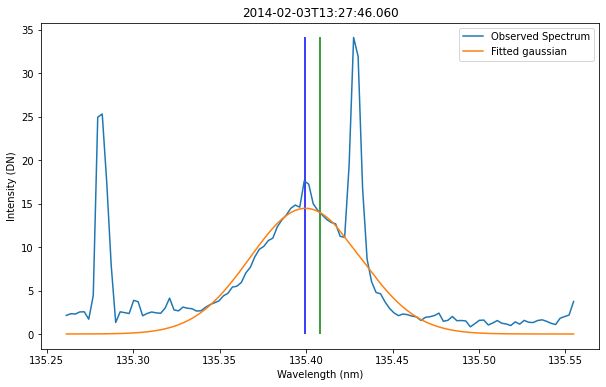

Fitted mean =  135.40264083979088
Fitted standard deviation =  0.03125727105718483


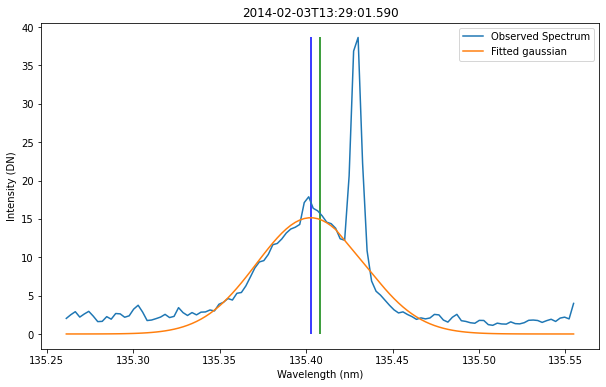

Fitted mean =  135.40108896423294
Fitted standard deviation =  0.03192996214862753


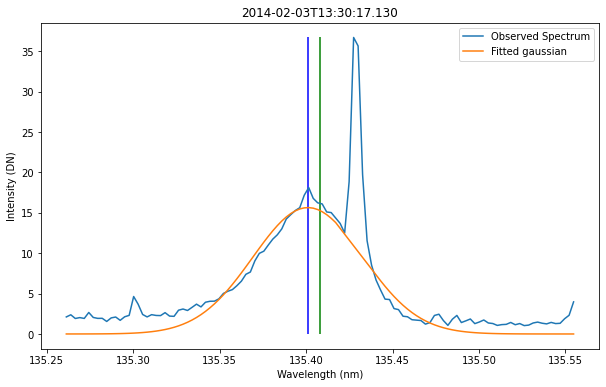

Fitted mean =  135.40338683220398
Fitted standard deviation =  0.028348743062373363


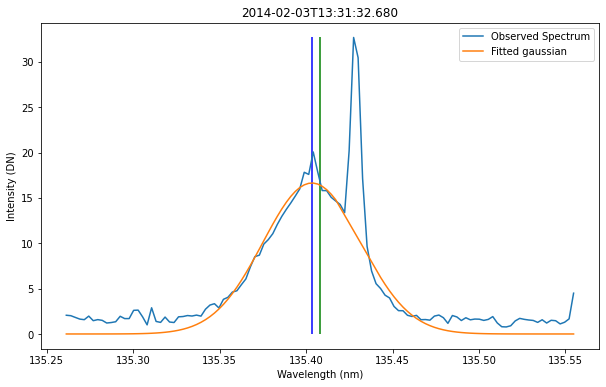

Fitted mean =  135.40371895245926
Fitted standard deviation =  0.029272488861130687


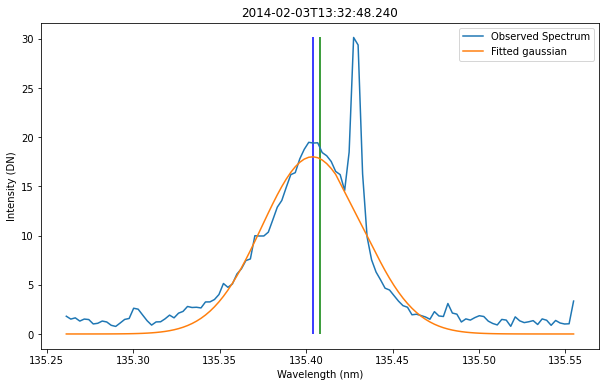

Fitted mean =  135.40317263130947
Fitted standard deviation =  0.027245232422566233


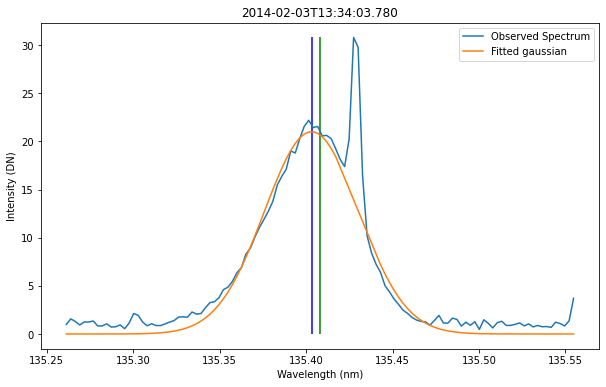

Fitted mean =  135.40445854518288
Fitted standard deviation =  0.02506645975651368


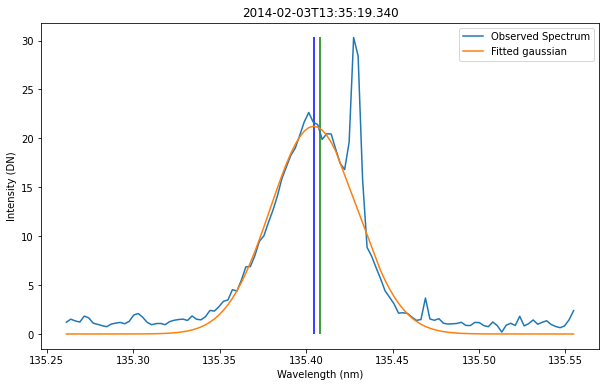

Fitted mean =  135.40585294742388
Fitted standard deviation =  0.023817434398207802


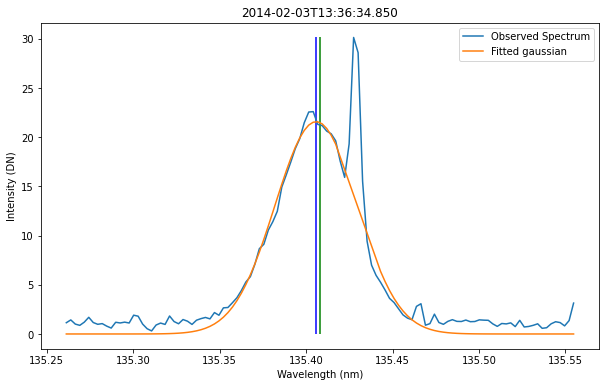

In [29]:

wvl = wave
wvl_pre = wavelength[14:128]
s = (10,3)
c1 = np.zeros(s)
for j in range(10):
  sp = data[j] # unblended data
  sp_pre = box_data_avg[j,:]
  # p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
  p = [15., 135.4, 0.05]
  
  coeff, var_matrix = curve_fit(gauss, wvl, sp, p0=p)
  c1[j,:] = coeff
  # Get the fitted curve
  sp_fit = gauss(wvl, *coeff)
  hdr1 = extract_irisL2data.only_header(raster_files[j+15])
  plt.plot(wvl_pre, sp_pre, label='Observed Spectrum')
  plt.plot(wvl, sp_fit, label='Fitted gaussian')
  plt.vlines(wvl_rest,ymin=0, ymax =np.amax(sp_pre),colors = 'green')  #vertical lines plot
  plt.vlines(coeff[1],ymin=0, ymax =np.amax(sp_pre),colors = 'blue')
  plt.legend()
  plt.title(hdr1['DATE_OBS'])
  plt.xlabel("Wavelength (nm)")
  plt.ylabel("Intensity (DN)")
  # Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
  print('Fitted mean = ', coeff[1])
  print('Fitted standard deviation = ', coeff[2])

  plt.show()

**Double Gaussian fitting**

In [30]:
def gauss2(x, *p):
    c= p[0:3]
    d=p[3:6]
    A1, mu1, sigma1 = c
    A2, mu2, sigma2 = d
    return A1*np.exp(-(x-mu1)**2/(2.*sigma1**2))+A2*np.exp(-(x-mu2)**2/(2.*sigma2**2))

(114,)
14.330693016353695 135.39774027312265 0.03583517333868087 32.174132836320844 135.4292236349119 -0.0028914498276895713
Fitted mean =  135.39774027312265
Fitted standard deviation =  0.03583517333868087


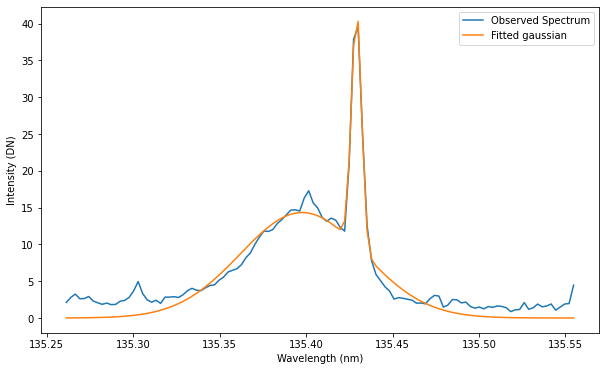

In [31]:
wvl = wavelength[14:128]
sp = box_data_avg[0,:]
print(np.shape(sp))
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p1 = [15., 135.40, 0.1,25,135.44,0.02] # initial guess for 15
#p1 = [15,135.44,0.02,5., 135.40, 0.1] #initial guess for 18
coeff, var_matrix = curve_fit(gauss2, wvl, sp, p0=p1)
print(*coeff)
# Get the fitted curve
sp_fit = gauss2(wvl, *coeff)
plt.plot(wvl, sp, label='Observed Spectrum')
plt.plot(wvl, sp_fit, label='Fitted gaussian')
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('Fitted mean = ', coeff[1])
print('Fitted standard deviation = ', coeff[2])

# plt.show()

# **7.2 Determining The parameters**

# **Doppler Shift**

In [32]:
wvl_rest = 135.408 #rest wavelength (We have taken this rest wavelength from the paper (Polito et al 2014)) for line FeXXI
c = 3e+5
v = []
for j in range(10):
  wvl_sft = c1[j,1]
  #print(wvl_sft)
  v.append(((wvl_sft-wvl_rest)/wvl_rest) *c)
  print('Doppler Velocity = ',v) # in unit of Km/s

Doppler Velocity =  [-21.98593660970621]
Doppler Velocity =  [-21.98593660970621, -14.034007889169253]
Doppler Velocity =  [-21.98593660970621, -14.034007889169253, -18.510468923626682]
Doppler Velocity =  [-21.98593660970621, -14.034007889169253, -18.510468923626682, -11.87336097374671]
Doppler Velocity =  [-21.98593660970621, -14.034007889169253, -18.510468923626682, -11.87336097374671, -15.31158225595261]
Doppler Velocity =  [-21.98593660970621, -14.034007889169253, -18.510468923626682, -11.87336097374671, -15.31158225595261, -10.220595081551458]
Doppler Velocity =  [-21.98593660970621, -14.034007889169253, -18.510468923626682, -11.87336097374671, -15.31158225595261, -10.220595081551458, -9.484773884990545]
Doppler Velocity =  [-21.98593660970621, -14.034007889169253, -18.510468923626682, -11.87336097374671, -15.31158225595261, -10.220595081551458, -9.484773884990545, -10.695162820173183]
Doppler Velocity =  [-21.98593660970621, -14.034007889169253, -18.510468923626682, -11.87336097

Text(0, 0.5, 'Blue shifted Doppler velocity(Km/s)')

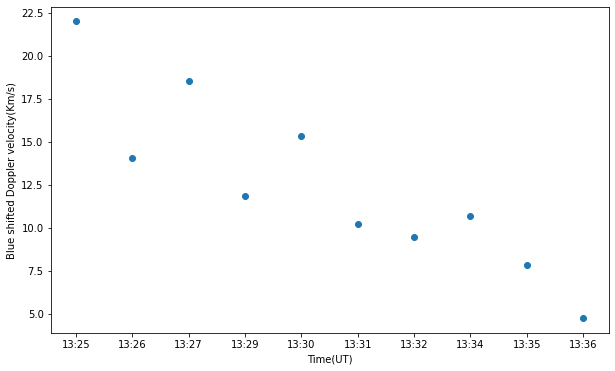

In [33]:
time = []
for j in range(10):
  hdr1 = extract_irisL2data.only_header(raster_files[j+15])
  time.append(hdr1['DATE_OBS'][11:16])

plt.scatter(time,np.abs(v))
plt.xlabel("Time(UT)")
plt.ylabel("Blue shifted Doppler velocity(Km/s)")